In [2]:
import torch
%load_ext autoreload
%autoreload 2

import os

import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.decomposition import PCA
from patsy import dmatrices

DATA_DIR = '../data'
EMBEDDING_FILE = 'embeddings.npy'
META_FILE = 'mimic_meta.csv'

REDUCE_DIM = True
N_COMPONENTS = 111
TARGET_DISEASE = 'Pleural Effusion'

In [3]:
from src.utils import get_mimic_meta_data

train_df, val_df, test_df = get_mimic_meta_data(os.path.join(DATA_DIR, META_FILE))
print(f'DATASET SIZES: TRAIN {len(train_df)} | VAL {len(val_df)} | TEST {len(test_df)}')

emb = np.load(os.path.join(DATA_DIR, EMBEDDING_FILE))
train_emb = emb[train_df['idx']]
test_emb = emb[test_df['idx']]

DATASET SIZES: TRAIN 225666 | VAL 1819 | TEST 3226


In [4]:
from src.svd import SVD, PCA

#svd = SVD()
svd = PCA()
svd.fit(train_emb)

In [7]:
n_comps = 300
print(f'Explained variance: {svd.get_total_variance(n_comps):.3f}')

Explained variance: 0.930


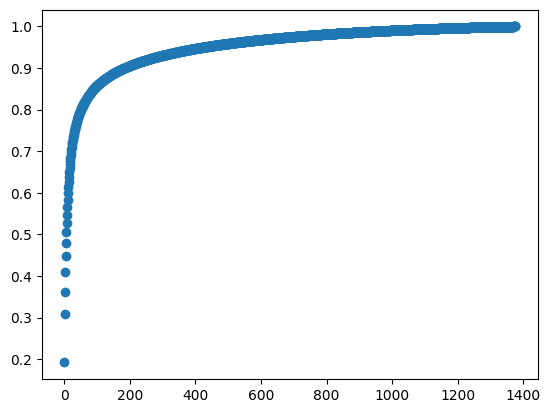

In [10]:
import matplotlib.pyplot as plt

variance_ratio = svd.explained_variance_ratio_
plt.scatter(range(len(variance_ratio)), variance_ratio)
plt.show()